In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


In [30]:
# Example: adjust path according to your system
df = pd.read_csv(r"C:\Users\vinit\Downloads\corizo\spotify dataset.csv")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (32833, 23)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [31]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [32]:
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo']
X = df[features]
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036
1,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972
2,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008
3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956
4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Shape after scaling:", X_scaled.shape)

Shape after scaling: (32833, 9)


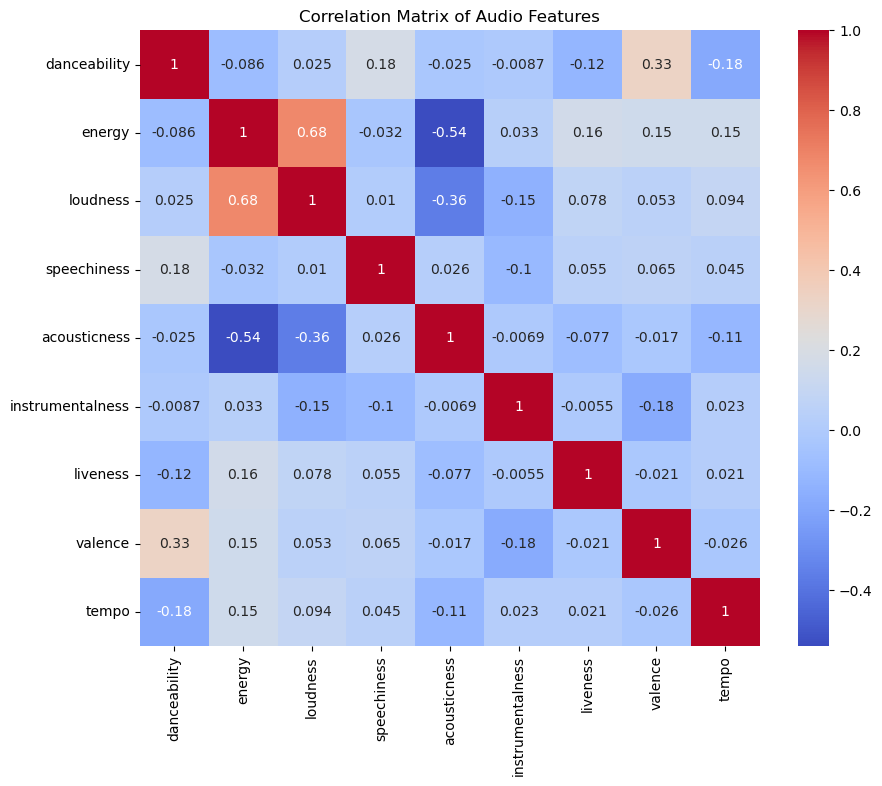

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Audio Features")
plt.show()

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df['Cluster'].value_counts()

Cluster
1    11606
0     9171
2     4894
4     4610
3     2552
Name: count, dtype: int64

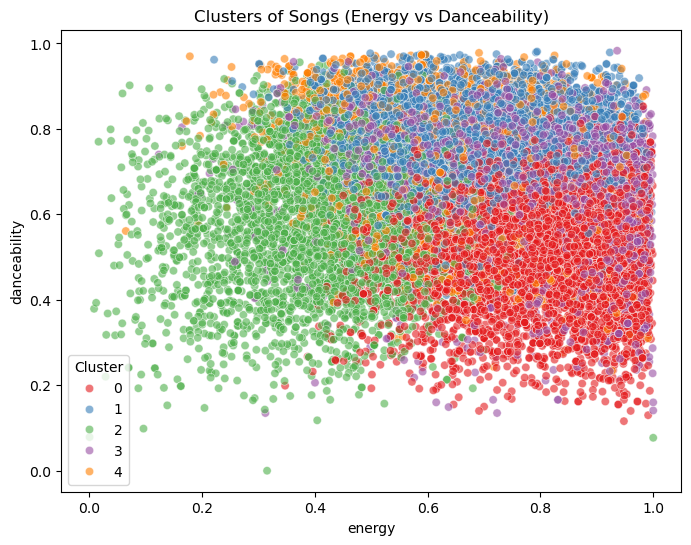

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="energy", y="danceability", hue="Cluster", palette="Set1", alpha=0.6)
plt.title("Clusters of Songs (Energy vs Danceability)")
plt.show()

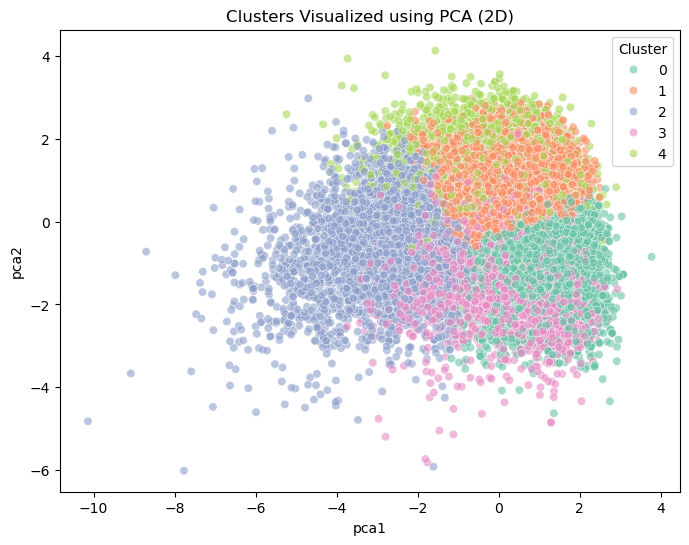

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X_scaled)

df['pca1'] = pca_result[:,0]
df['pca2'] = pca_result[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="Cluster", palette="Set2", alpha=0.6)
plt.title("Clusters Visualized using PCA (2D)")
plt.show()

Cluster Profiles (feature means):


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
Cluster,,,,,,,,,
0,0.54,0.80,-5.27,0.07,0.07,0.03,0.25,0.39,131.78
1,0.74,0.72,-6.21,0.07,0.14,0.01,0.16,0.67,114.30
2,0.60,0.43,-10.43,0.07,0.51,0.09,0.16,0.39,112.49
3,0.66,0.78,-6.96,0.07,0.08,0.75,0.19,0.39,125.08
4,0.72,0.67,-6.81,0.31,0.18,0.01,0.20,0.55,122.35


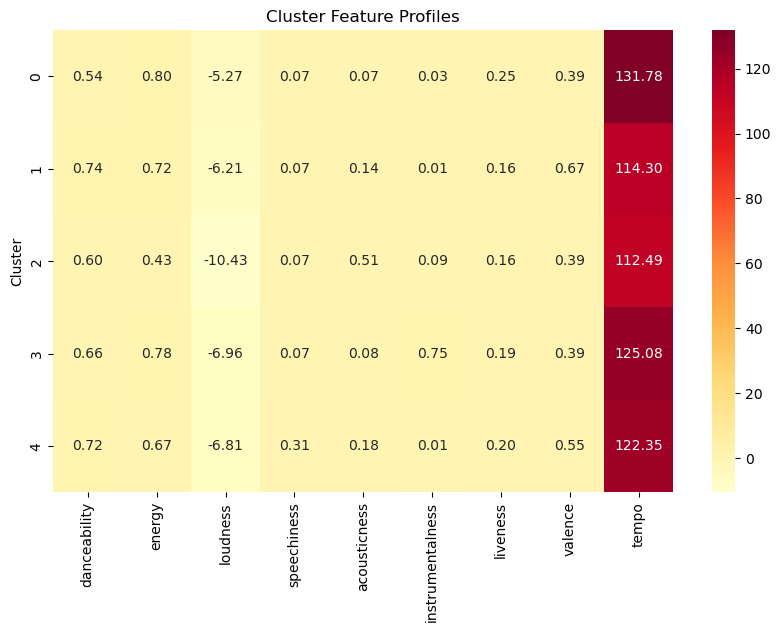

In [38]:
cluster_profiles = df.groupby("Cluster")[features].mean().round(2)
print("Cluster Profiles (feature means):")
display(cluster_profiles)

plt.figure(figsize=(10,6))
sns.heatmap(cluster_profiles, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Cluster Feature Profiles")
plt.show()

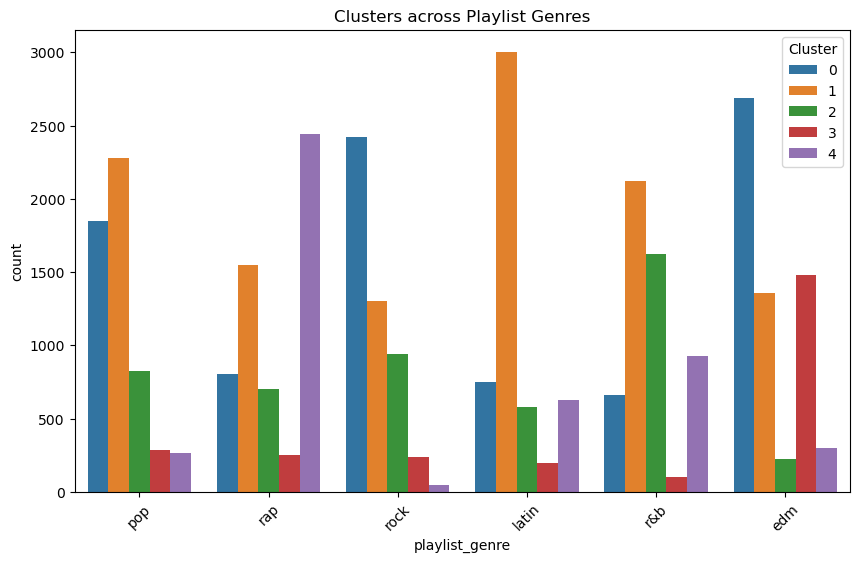

In [39]:
if "playlist_genre" in df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x="playlist_genre", hue="Cluster", palette="tab10")
    plt.title("Clusters across Playlist Genres")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No playlist_genre column in dataset.")

C:\Users\vinit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


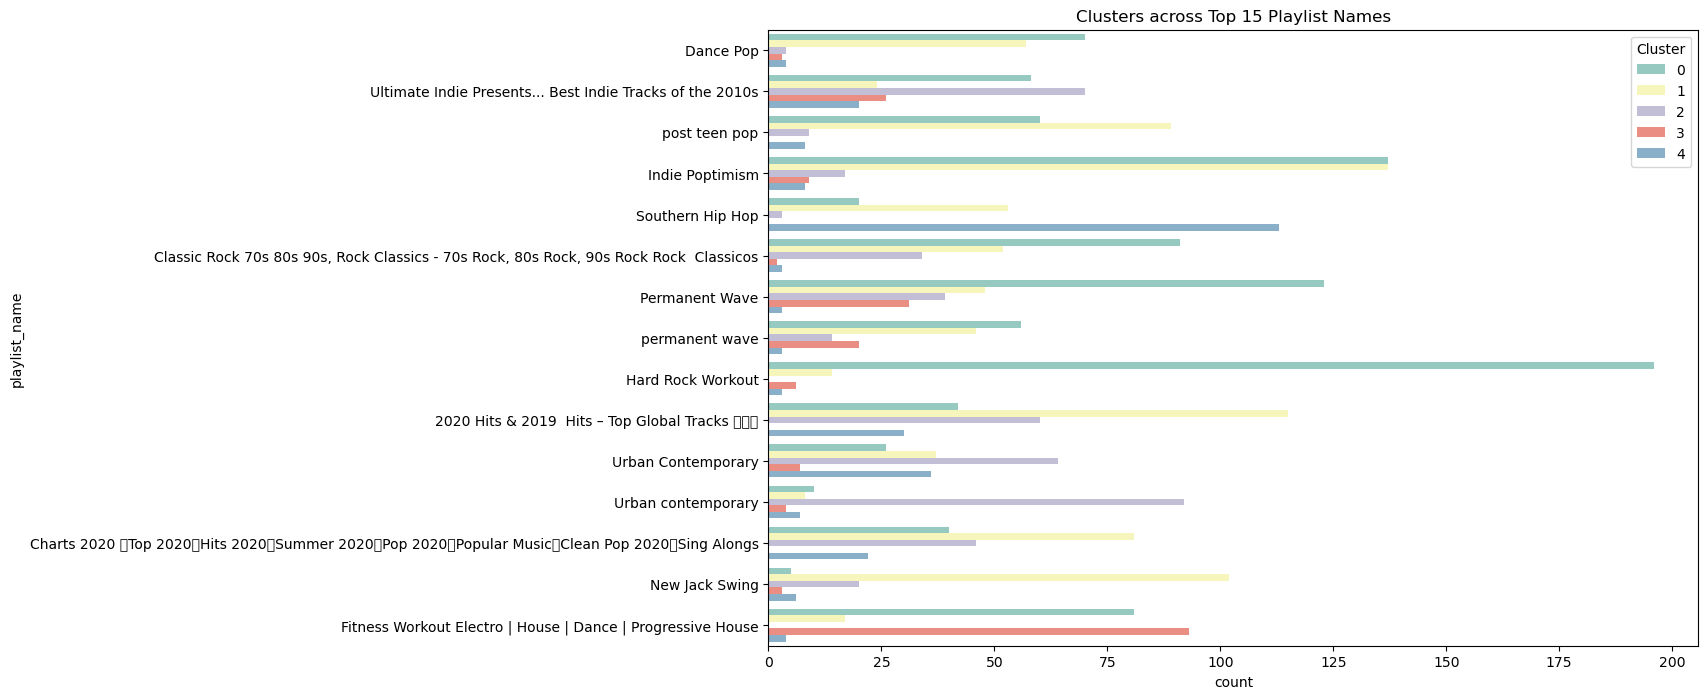

In [40]:
if "playlist_name" in df.columns:
    top_playlists = df["playlist_name"].value_counts().head(15).index
    subset = df[df["playlist_name"].isin(top_playlists)]

    plt.figure(figsize=(12,8))
    sns.countplot(data=subset, y="playlist_name", hue="Cluster", palette="Set3")
    plt.title("Clusters across Top 15 Playlist Names")
    plt.show()
else:
    print("No playlist_name column in dataset.")

In [41]:
from sklearn.neighbors import NearestNeighbors


nn = NearestNeighbors(n_neighbors=6, algorithm="auto").fit(X_scaled)

def recommend_song(song_name, n=5):

    if song_name not in df["track_name"].values:
        return f"Song '{song_name}' not found in dataset."

    idx = df[df["track_name"] == song_name].index[0]


    distances, indices = nn.kneighbors([X_scaled[idx]], n_neighbors=n+1)

    recommendations = df.iloc[indices[0][1:]][["track_name","track_artist","playlist_genre","Cluster"]]
    return recommendations.reset_index(drop=True)


recommend_song("Body On My", n=5)

,track_name,track_artist,playlist_genre,Cluster
0,"Body on My (feat. Brando, Pitbull & Nicky Jam)",Loud Luxury,edm,1
1,Moves Like Jagger,Maroon 5,pop,1
2,Moves Like Jagger,Maroon 5,edm,1
3,Moves Like Jagger - Studio Recording From The ...,Maroon 5,latin,1
4,"My Love (feat. Major Lazer, WizKid, Dua Lipa)",Wale,pop,1


In [42]:
df.to_csv("spotify_songs.csv", index=False)
print("Clustered dataset saved as spotify_songs.csv")

Clustered dataset saved as spotify_songs.csv


In [43]:
from sklearn.neighbors import NearestNeighbors

# Train Nearest Neighbors on scaled features
nn = NearestNeighbors(n_neighbors=6, algorithm="auto").fit(X_scaled)

def recommend_song(song_name, n=5):
    # Find the index of the song
    if song_name not in df["track_name"].values:
        return f"Song '{song_name}' not found in dataset."

    idx = df[df["track_name"] == song_name].index[0]

    # Get nearest neighbors (first neighbor will be the song itself)
    distances, indices = nn.kneighbors([X_scaled[idx]])

    # Exclude the song itself and return top-n recommendations
    recommendations = df.iloc[indices[0][1:n+1]][["track_name", "artists", "playlist_name", "playlist_genre"]]

    return recommendations